# Text Mining - Sentimental Analysis

In [1]:
import pandas as pd  
import numpy as np 
import re
import string 
import spacy
import nltk

import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
%matplotlib inline
import seaborn as sns

from nltk import tokenize
from nltk.stem import PorterStemmer 
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt') # punctuations
from wordcloud import WordCloud,STOPWORDS

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
tweet = pd.read_csv("/Elon_musk.csv", encoding = "Latin-1")
tweet= tweet[["Text"]]
tweet.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


### Text Pre-Processing 

In [3]:
tweet = [Text.strip() for Text in tweet.Text] # remove both the leading and the trailing characters(empty/white space)
tweet = [Text for Text in tweet if Text] # removes empty strings, because they are considered in Python as False
tweet[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [4]:
# Joining the list into one string/text
ttext = " ".join(tweet)

### Punctuation

In [5]:
no_punc_text = ttext.translate(str.maketrans(" "," ", string.punctuation)) 
no_punc_text = re.sub(r"http\S+","", no_punc_text) # to remove URL

### Tokenization

In [6]:
# tokeinzing using tweettokenizer first and then wordtokenizer
tweet_token = TweetTokenizer(strip_handles=True)
tweets_tokens = tweet_token.tokenize(no_punc_text)
print("Tweet Tokens-",len(tweets_tokens))
Tweettoken = " ".join(tweets_tokens)
text_tokens = word_tokenize(Tweettoken)
print("Word Tokens-",len(text_tokens))

Tweet Tokens- 21395
Word Tokens- 21400


### Stop Words

In [7]:
my_stop_words = pd.read_csv("/stop.txt", sep=" ", header = None, names = ["StopWords"])
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
sw_list  = {"U0001F440","I","re","U0001F9DB","RT","\x93","\x92","U0001F923"}
no_stop_tokens = [ele for ele in no_stop_tokens if ele not in sw_list]
len(no_stop_tokens)

20748

### Normalization

In [8]:
lower_words = [x.lower() for x in no_stop_tokens]

### Lemmatizaion

In [9]:
# NLP english language model of spacy library
nlp = spacy.load("en_core_web_sm")
# lemmas being one of them, but mostly Part Of Speech, which will follow later
doc = nlp(" ".join(lower_words))
lemmas = [token.lemma_ for token in doc]
Processed_Tweets = " ".join(lemmas)

### Feature Extraction
### Count Vectorizer

In [10]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)
print(X.toarray().shape)

(20775, 4332)


### Bi-grams and Tri-grams

In [11]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(lemmas)
print("Feature Names-",vectorizer_ngram_range.get_feature_names())
print("\n","BOW Matrix-",bow_matrix_ngram.toarray())
print("\n","Matrix Size: ",bow_matrix_ngram.toarray().shape)

Feature Names- ['about', 'all', 'also', 'amp', 'an', 'and', 'as', 'at', 'be', 'but', 'by', 'can', 'car', 'cleantechnica', 'come', 'day', 'do', 'dragon', 'engine', 'erdayastronaut', 'first', 'flcnhvy', 'flight', 'for', 'from', 'get', 'go', 'good', 'great', 'haha', 'have', 'he', 'high', 'idaacarmack', 'if', 'in', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'maybe', 'model', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 'should', 'so', 'some', 'spacestation', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'test', 'than', 'that', 'the', 'there', 'they', 'this', 'time', 'to', 'too', 'true', 'u0001f923u0001f923', 'use', 'we', 'well', 'what', 'wholemarsblog', 'will', 'with', 'work', 'would', 'yeah', 'year', 'yes', 'you']

 BOW Matrix- [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0

### TF-IDF Vectorizer

In [12]:
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 200)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(lemmas)
print("Feature Names",vectorizer_n_gram_max_features.get_feature_names())
print("\n","BOW Matrix-",tf_idf_matrix_n_gram_max_features.toarray())
print("\n","Matrix Size: ",tf_idf_matrix_n_gram_max_features.toarray().shape)

Feature Names ['3d', '45', 'about', 'absolutely', 'actually', 'ajtourville', 'all', 'also', 'amp', 'an', 'and', 'as', 'astronaut', 'at', 'austinbarnard', 'back', 'bar', 'be', 'berniesander', 'beta', 'big', 'booster', 'build', 'but', 'by', 'can', 'car', 'cleantechnica', 'come', 'complete', 'cool', 'could', 'crew', 'day', 'design', 'djsnm', 'do', 'don', 'down', 'dragon', 'early', 'earth', 'engine', 'engineering', 'engineersfeed', 'ercxspace', 'erdayastronaut', 'evafoxu', 'even', 'ever', 'exactly', 'falcon', 'feel', 'felixschlang', 'few', 'fire', 'first', 'flcnhvy', 'flight', 'for', 'from', 'fsd', 'future', 'game', 'get', 'go', 'good', 'great', 'haha', 'hard', 'have', 'he', 'high', 'icannotenough', 'idaacarmack', 'if', 'in', 'into', 'it', 'just', 'kristennetten', 'land', 'launch', 'lexfridman', 'life', 'like', 'long', 'look', 'lot', 'love', 'make', 'many', 'mar', 'marcushousegame', 'maybe', 'mission', 'model', 'month', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'neop

### Wordcloud

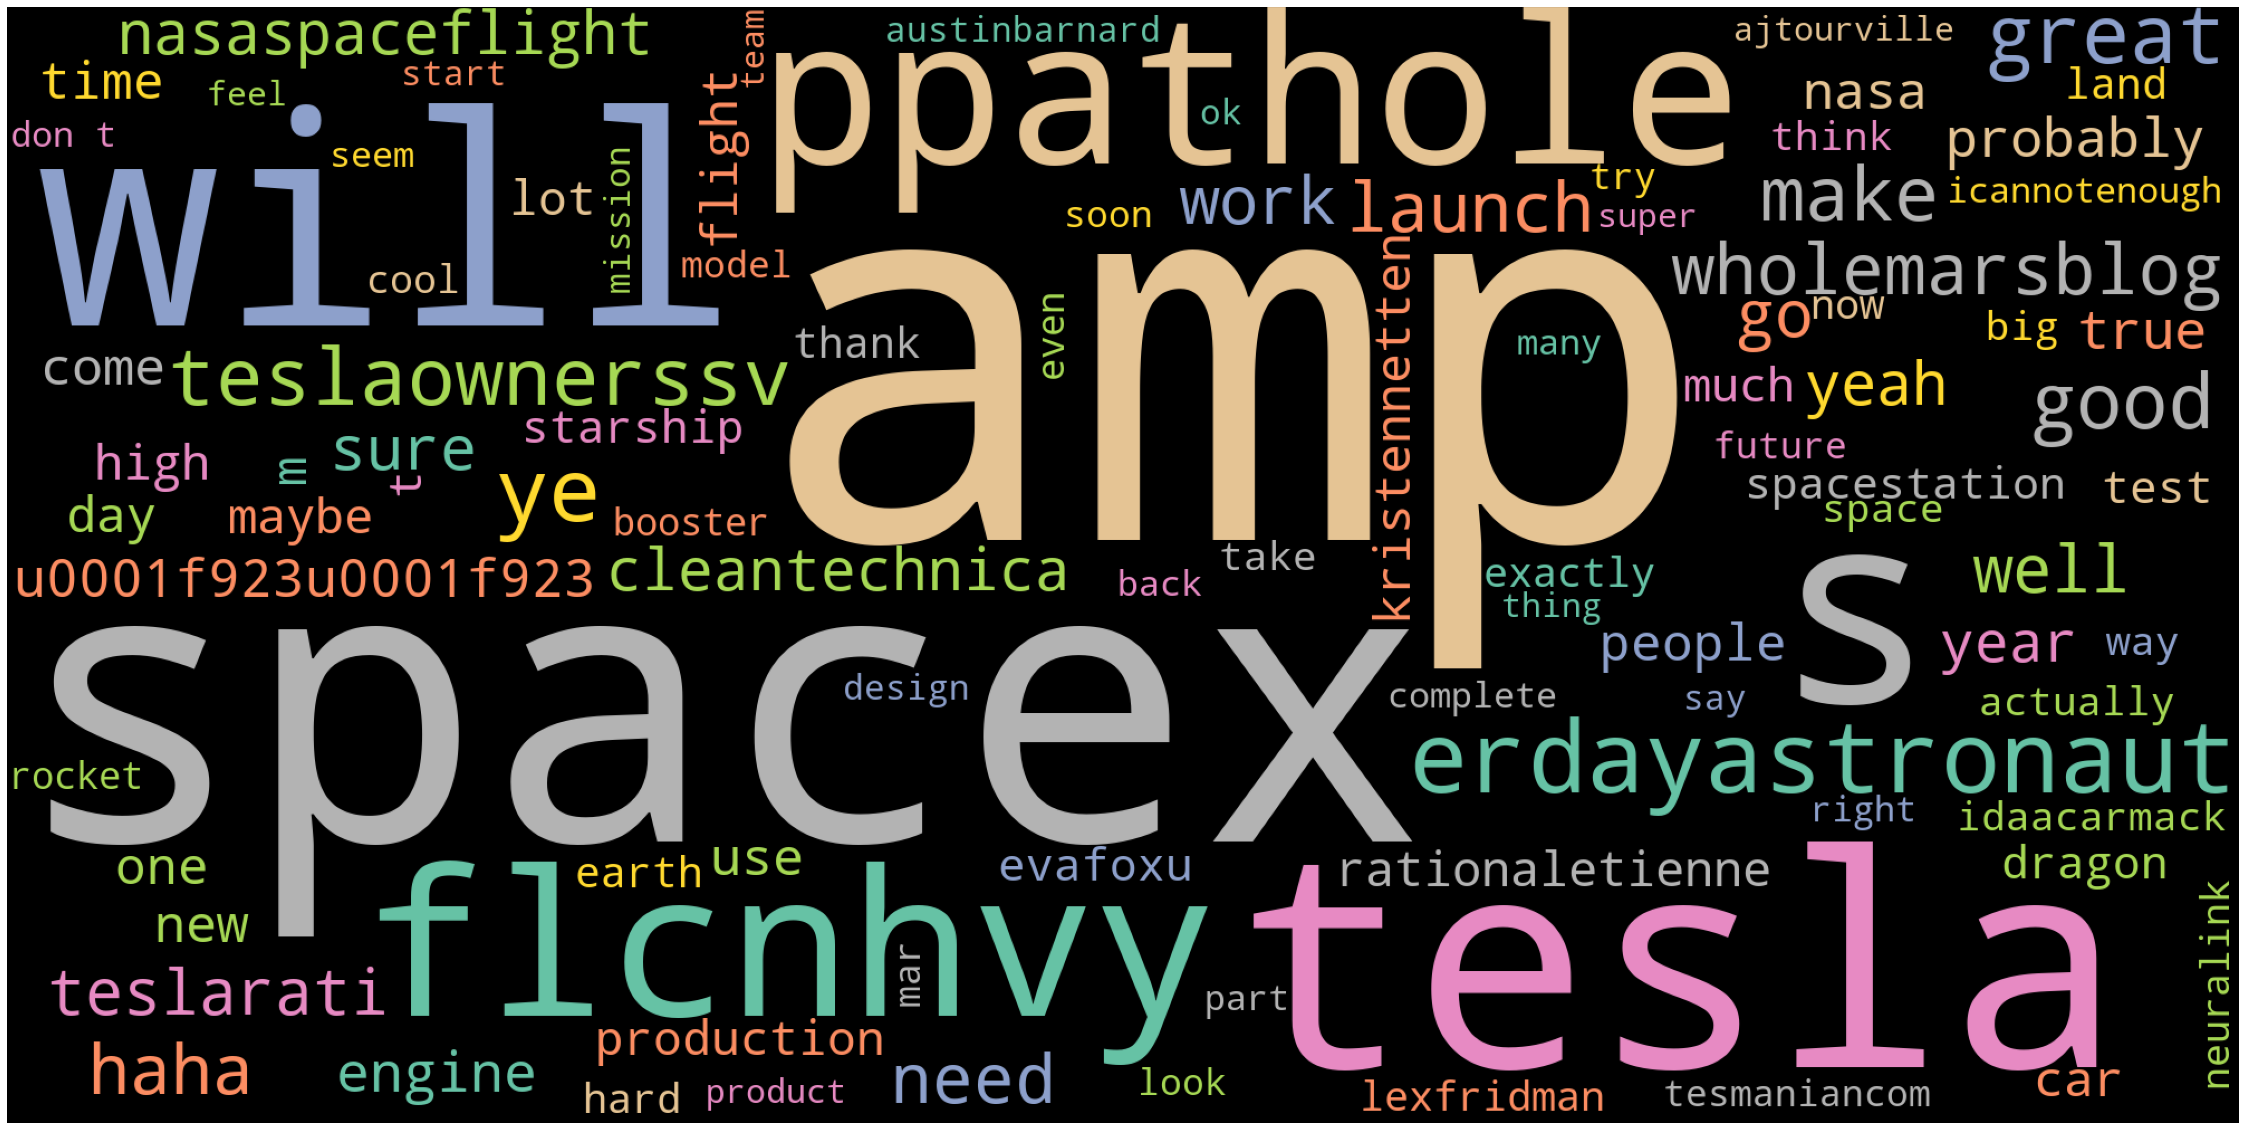

In [13]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud)  
    plt.axis("off");
    
# Generate & plot wordcloud
stopwords = STOPWORDS
wordcloud=WordCloud(width=2000,height=1000,background_color="black",max_words=100,colormap="Set2",stopwords=stopwords).generate(Processed_Tweets)
plot_cloud(wordcloud)

### Name Entity Recognition
### Entity Tagging

In [14]:
nlp = spacy.load("en_core_web_sm")
one_block = Processed_Tweets
doc_block = nlp(one_block)

### Parts of Speech Tagging

In [15]:
for token in doc_block[0:20]:
    print(token,"-", token.pos_)

kunalb - VERB
11 - NUM
m - NUM
an - DET
alien - ADJ
idaacarmack - NOUN
ray - NOUN
trace - NOUN
on - ADP
cyberpunk - NOUN
with - ADP
hdr - NOUN
be - AUX
nextlevel - ADJ
have - AUX
you - PRON
try - VERB
it - PRON
joerogan - PROPN
spotify - VERB


In [16]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ("NOUN","VERB")]
print(nouns_verbs[0:25])

['kunalb', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'try', 'spotify', 'interview', 'gtera', 'execution', 'year', 'year', 'ox', 'frodo', 'underdoge', 'think', 'fail', 'tweet', 'represent', 'time', 'allocation', 'outcome', 'be', 'send']


In [17]:
#Counting tokens again
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ["word", "count"]
print(len(wf_df))
wf_df[0:10]

2374


,word,count
0,spacex,188
1,amp,164
2,have,99
3,be,95
4,launch,64
5,make,64
6,tesla,50
7,do,49
8,work,49
9,year,48


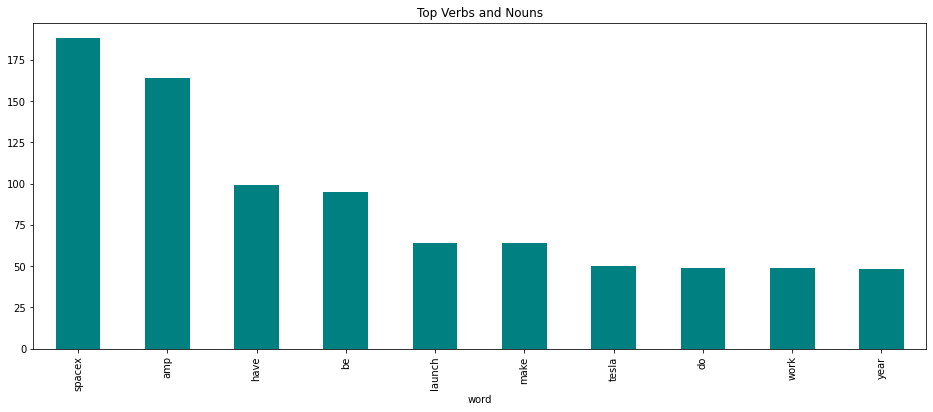

In [18]:
#Barchart for top 10 nouns + verbs
wf_df[0:10].plot.bar(x="word",figsize=(16,6),legend=False,title="Top Verbs and Nouns",color="teal");

### Sentimental Analysis

In [19]:
#tokenize into sentences
sentences = tokenize.sent_tokenize(" ".join(tweet))
sentences[0:5]

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!']

In [20]:
#review to individual sentences
sent_df = pd.DataFrame(sentences, columns=["sentence"])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
919,"@kenyanwalstreet Not actually a payout, just a..."
920,"It may never pay out, as the stock cant b ht..."
921,Details Aug 28.
922,AI symbiosis while u wait @vistacruiser7 @flcn...


**Using Given file lexicons**

In [21]:
#loading positive and negative words file
positive=pd.read_csv("/positive.txt",sep=" ",header=None,names=["words"])
negative= pd.read_csv("/negative.txt", encoding = "Latin-1",sep=" ",header=None,names=["words"])
print("Postive-",positive.shape,", Negative-",negative.shape)

Postive- (2006, 1) , Negative- (4783, 1)


In [22]:
stemmer = PorterStemmer()

#preprocess function 
stem_words=lambda x: stemmer.stem(x)
break_into_words = lambda x : re.findall("[a-zA-Z0-9]+", x)
skip_numeric = lambda x : [w for w in x if not w.isnumeric()]

#apply pre-processing steps
processed_text=sent_df["sentence"].map(break_into_words)\
        .map(skip_numeric)
sent_df["processed"]=processed_text

In [23]:
#count number of positive words
positive_words_count=processed_text.map(lambda x: len([w for w in x if w in list(positive["words"])]))

#count number of negative words
negative_words_count=processed_text.map(lambda x: len([w for w in x if w in list(negative["words"])]))

sent_df["word_count"] = sent_df["sentence"].str.split().apply(len)
sent_df["positive"]=positive_words_count
sent_df["negative"]=negative_words_count
sent_df["sentiment_score"]=sent_df["positive"]-sent_df["negative"]

sent_df

,sentence,processed,word_count,positive,negative,sentiment_score
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,"[kunalb11, I, m, an, alien, ID, AA, Carmack, R...",13,0,0,0
1,Have you tried it?,"[Have, you, tried, it]",4,0,0,0
2,@joerogan @Spotify Great interview!,"[joerogan, Spotify, Great, interview]",4,0,0,0
3,@gtera27 Doge is underestimated @teslacn Congr...,"[gtera27, Doge, is, underestimated, teslacn, C...",13,1,0,1
4,Now on to the next for even more!!,"[Now, on, to, the, next, for, even, more]",8,0,0,0
...,...,...,...,...,...,...
919,"@kenyanwalstreet Not actually a payout, just a...","[kenyanwalstreet, Not, actually, a, payout, ju...",11,0,0,0
920,"It may never pay out, as the stock cant b ht...","[It, may, never, pay, out, as, the, stock, can...",31,2,1,1
921,Details Aug 28.,"[Details, Aug]",3,0,0,0
922,AI symbiosis while u wait @vistacruiser7 @flcn...,"[AI, symbiosis, while, u, wait, vistacruiser7,...",47,2,2,0


In [24]:
# Sentiment score of the whole tweet
sent_df[["sentiment_score"]].describe()

,sentiment_score
count,924.000000
mean,0.310606
std,1.086635
min,-5.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,7.000000


In [25]:
# Sentiment score of the review - Negative Score Filtering
sent_df[sent_df["sentiment_score"]<0].tail()

,sentence,processed,word_count,positive,negative,sentiment_score
891,Ratio of retirees to workers is https://t.co/...,"[Ratio, of, retirees, to, workers, is, https, ...",61,1,3,-2
899,A rocket that is single use is just as absurd ...,"[A, rocket, that, is, single, use, is, just, a...",15,0,1,-1
901,@SpaceflightNow Were being extra paranoid.,"[SpaceflightNow, We, re, being, extra, paranoid]",5,0,1,-1
906,Extreme https://t.co/fs0PmcIoic @jgrano305 @T...,"[Extreme, https, t, co, fs0PmcIoic, jgrano305,...",72,0,1,-1
907,"Technically, https://t.co/TcIVzvc5RA @MightyT...","[Technically, https, t, co, TcIVzvc5RA, Mighty...",26,0,1,-1


**Using Affin lexicon**

In [26]:
#Sentiment analysis
afinn = pd.read_csv("/Afinn.csv",sep=",", encoding="latin-1")
print(afinn.shape)
afinn.head()

(2477, 2)


,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [27]:
#creating a dictionary for affin scores
affinity_scores = afinn.set_index("word")["value"].to_dict()

In [28]:
#Custom function :score each word in a sentence in lemmatised form,but calculate the score for the whole original sentence.
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores
# user defined function to calculate aggregate scores
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [29]:
#sentiment on whole text
sent_df["A_sentiment_value"] = sent_df["sentence"].apply(calculate_sentiment)
sent_df.head()

,sentence,processed,word_count,positive,negative,sentiment_score,A_sentiment_value
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,"[kunalb11, I, m, an, alien, ID, AA, Carmack, R...",13,0,0,0,0
1,Have you tried it?,"[Have, you, tried, it]",4,0,0,0,0
2,@joerogan @Spotify Great interview!,"[joerogan, Spotify, Great, interview]",4,0,0,0,3
3,@gtera27 Doge is underestimated @teslacn Congr...,"[gtera27, Doge, is, underestimated, teslacn, C...",13,1,0,1,3
4,Now on to the next for even more!!,"[Now, on, to, the, next, for, even, more]",8,0,0,0,0


In [30]:
# Sentiment score of the whole tweet
sent_df[["A_sentiment_value"]].describe()

,A_sentiment_value
count,924.00000
mean,1.37013
std,2.67799
min,-8.00000
25%,0.00000
50%,0.00000
75%,3.00000
max,16.00000


In [31]:
# Sentiment score of the review - Negative Score Filtering
sent_df[sent_df["A_sentiment_value"]<0].tail()

,sentence,processed,word_count,positive,negative,sentiment_score,A_sentiment_value
886,This is primarily an electrical/electronic (ch...,"[This, is, primarily, an, electrical, electron...",69,1,4,-3,-4
887,Will those who write the algorithms ever reali...,"[Will, those, who, write, the, algorithms, eve...",11,0,2,-2,-3
894,No expert installer required.,"[No, expert, installer, required]",4,0,0,0,-1
920,"It may never pay out, as the stock cant b ht...","[It, may, never, pay, out, as, the, stock, can...",31,2,1,1,-4
922,AI symbiosis while u wait @vistacruiser7 @flcn...,"[AI, symbiosis, while, u, wait, vistacruiser7,...",47,2,2,0,-2


In [32]:
sent_df["index"]=range(0,len(sent_df))

**Comparision of both lexicons**

In [33]:
# Sentiment score of the whole tweet
sent_df[["A_sentiment_value","sentiment_score"]].describe()

,A_sentiment_value,sentiment_score
count,924.00000,924.000000
mean,1.37013,0.310606
std,2.67799,1.086635
min,-8.00000,-5.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,3.00000,1.000000
max,16.00000,7.000000


### Visualization

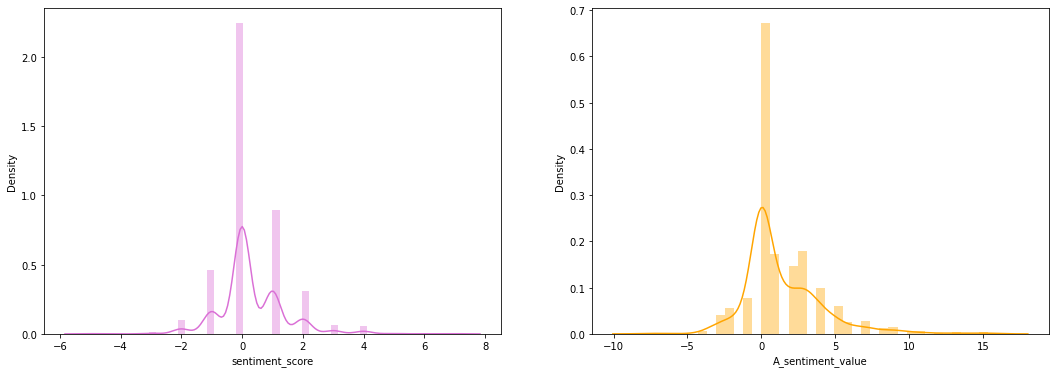

In [34]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.distplot(sent_df["sentiment_score"],color="orchid")

plt.subplot(1,2,2)
sns.distplot(sent_df["A_sentiment_value"],color="orange");

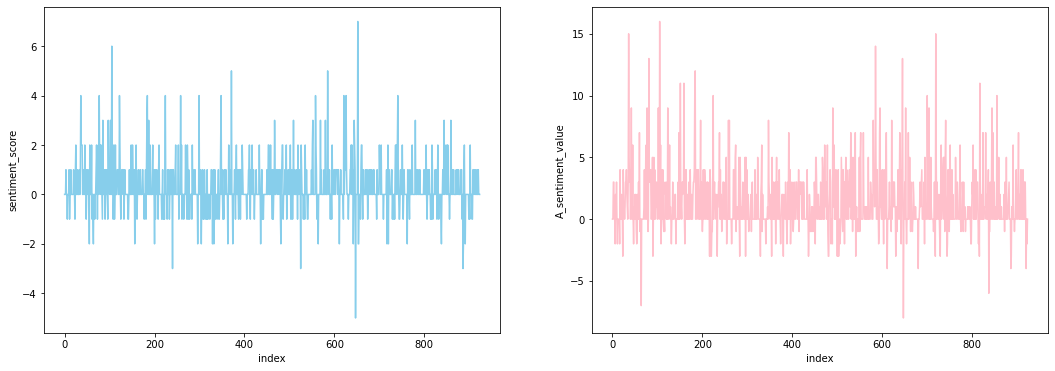

In [35]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
sns.lineplot(y="sentiment_score",x="index",data=sent_df,color="skyblue")

plt.subplot(1,2,2)
sns.lineplot(y="A_sentiment_value",x="index",data=sent_df,color="pink");

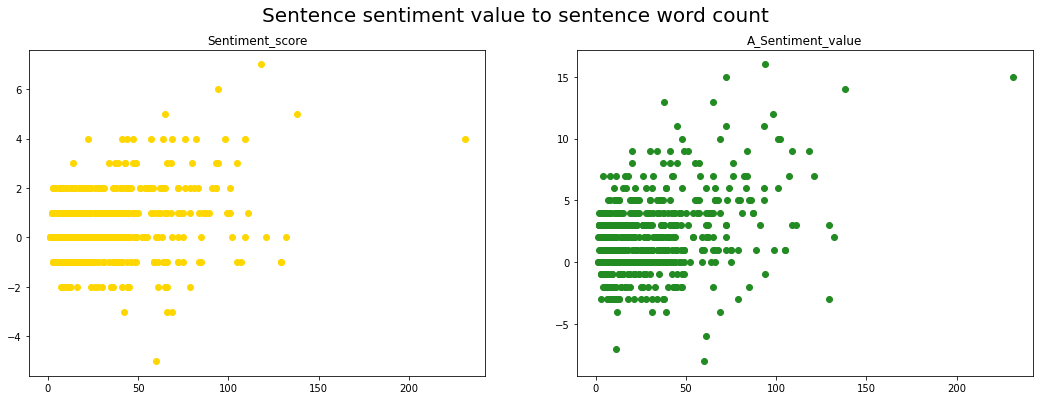

In [36]:
fig = plt.figure(figsize=(18,6))
plt.suptitle("Sentence sentiment value to sentence word count", size=20, y=0.98)

plt.subplot(1,2,1)
plt.scatter(x="word_count",y="sentiment_score",data=sent_df,color="gold")
plt.title("Sentiment_score")

plt.subplot(1,2,2)
plt.scatter(x="word_count",y="A_sentiment_value",data=sent_df,color="forestgreen")
plt.title("A_Sentiment_value");

**It can be seen that both lexicon are different and can bring a vast difference in text mining**